B) Implementação Computacional:

Usando linguagens de programação (Python, ou Matalb ou Octave, etc) implementar exemplos de modelos considerando:

5. Resposta dinâmica de estruturas usando integração numérica no domínio do tempo

Descrição da Implementação — Resposta Dinâmica com Newmark-Beta
1. Definição dos parâmetros do sistema
* Massa 𝑚 = 1,0 kg
* Rigidez k =1000,0 N/m
* Amortecimento c = 10,0 Ns/m

2. Configuração da simulação temporal
* Intervalo de tempo dt = 0,001 s
* Duração total T = 2,0 s
* Número de passos: n = 2000

3. Definição do carregamento
* Força senoidal: f(t) = 1000 ⋅ sin (20𝜋t)
* Representa uma excitação periódica no sistema

4. Parâmetros do método de Newmark-Beta
* 𝛽 = 0,25, 𝛾 = 0,5
* Escolha clássica para estabilidade e precisão em sistemas com amortecimento

5. Inicialização das variáveis
* Vetores de **deslocamento u**, **velocidade v** e **aceleração a** foram inicializados com zeros
* Condições iniciais: sistema em repouso

6. Cálculo da matriz efetiva
* A rigidez efetiva k_eff foi calculada para simplificar a resolução em cada passo

7. Integração passo a passo
* Para cada instante de tempo:
  * Calcula-se a força efetiva considerando inércia e amortecimento
  * Resolve-se o deslocamento u[i]
  * Atualizam-se aceleração a[i] e velocidade v[i]

8. Visualização dos resultados
* O gráfico mostra:
  * Deslocamento ao longo do tempo
  * Comparação com a carga normalizada f(t)/k
* Permite observar o comportamento vibratório do sistema sob excitação periódica

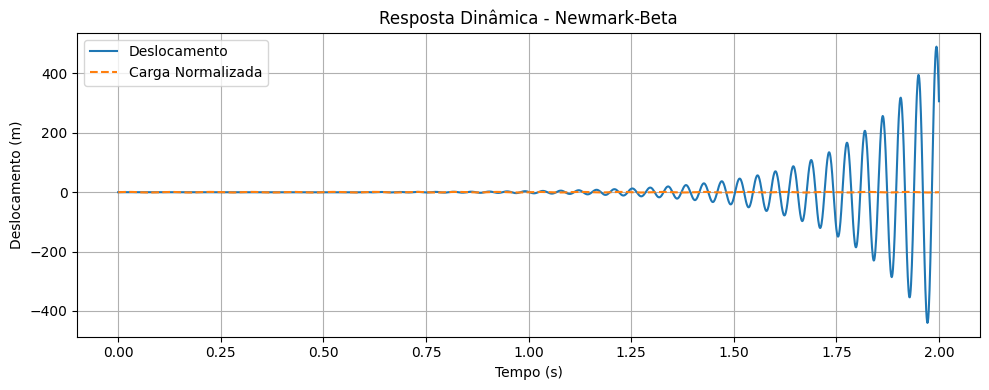

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros do sistema
m = 1.0       # kg
k = 1000.0    # N/m
c = 10.0      # Ns/m

# Tempo de simulação
dt = 0.001    # s
T = 2.0       # s
n_steps = int(T / dt)

# Vetores de tempo e força
t = np.linspace(0, T, n_steps)
f = 1000 * np.sin(20 * np.pi * t)  # força senoidal

# Parâmetros do método de Newmark
beta = 0.25
gamma = 0.5

# Inicialização
u = np.zeros(n_steps)
v = np.zeros(n_steps)
a = np.zeros(n_steps)

# Condições iniciais
u[0] = 0.0
v[0] = 0.0
a[0] = (f[0] - c*v[0] - k*u[0]) / m

# Matriz efetiva
k_eff = m / (beta * dt**2) + gamma * c / (beta * dt) + k

# Integração no tempo
for i in range(1, n_steps):
    f_eff = f[i] + \
        m * (u[i-1] / (beta * dt**2) + v[i-1] / (beta * dt) + (1/(2*beta) - 1) * a[i-1]) + \
        c * (v[i-1] + dt * (1 - gamma) * a[i-1])

    u[i] = f_eff / k_eff
    a[i] = (u[i] - u[i-1]) / (beta * dt**2) - v[i-1] / (beta * dt) - (1/(2*beta) - 1) * a[i-1]
    v[i] = v[i-1] + dt * ((1 - gamma) * a[i-1] + gamma * a[i])

# Plot da resposta
plt.figure(figsize=(10, 4))
plt.plot(t, u, label='Deslocamento')
plt.plot(t, f / k, '--', label='Carga Normalizada')
plt.xlabel('Tempo (s)')
plt.ylabel('Deslocamento (m)')
plt.title('Resposta Dinâmica - Newmark-Beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()